In [49]:
import pandas as pd
import tensorflow as tf
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt

In [50]:
test_datasets = pd.read_csv(r'C:\Users\Dell\OneDrive - Hanoi University of Science and Technology\Desktop\HUST\KHDL_IT4930\model\test_dataset_encode.csv', index_col=0)
test_datasets

,km_da_di,so_cho_ngoi,nam_sx,gia,tinh_trang_Mới,tinh_trang_Đã sử dụng,hang_Acura,hang_Audi,hang_BMW,hang_Bentley,...,kieu_dang_Truck,kieu_dang_Van/Minivan,kieu_dang_Wagon,nhien_lieu_Dầu,nhien_lieu_Hybrid,nhien_lieu_Xăng,nhien_lieu_Điện,hop_so_Bán tự động,hop_so_Số sàn,hop_so_Tự động
20375,0.017917,1.031024,-1.140908,-0.333399,-0.274231,0.274231,-0.017777,-0.084686,-0.13486,-0.039159,...,-0.147055,-0.309876,-0.013945,-0.42996,-0.056514,0.435383,-0.012076,-0.060891,1.359777,-1.348822
7195,-0.018886,0.578929,0.438161,-0.016130,-0.274231,0.274231,-0.017777,-0.084686,-0.13486,-0.039159,...,-0.147055,3.227096,-0.013945,2.32580,-0.056514,-2.296831,-0.012076,-0.060891,-0.735415,0.741387
14914,-0.018886,-0.325260,0.262709,-0.391726,-0.274231,0.274231,-0.017777,-0.084686,-0.13486,-0.039159,...,-0.147055,-0.309876,-0.013945,-0.42996,-0.056514,0.435383,-0.012076,-0.060891,1.359777,-1.348822
18560,-0.033086,-0.325260,0.789065,-0.152652,-0.274231,0.274231,-0.017777,-0.084686,-0.13486,-0.039159,...,-0.147055,-0.309876,-0.013945,-0.42996,-0.056514,0.435383,-0.012076,-0.060891,-0.735415,0.741387
2310,-0.040906,-1.681545,0.087257,-0.359678,-0.274231,0.274231,-0.017777,-0.084686,-0.13486,-0.039159,...,-0.147055,3.227096,-0.013945,-0.42996,-0.056514,0.435383,-0.012076,-0.060891,-0.735415,0.741387
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8837,0.053182,-0.325260,-1.140908,-0.442361,-0.274231,0.274231,-0.017777,-0.084686,-0.13486,-0.039159,...,-0.147055,-0.309876,-0.013945,-0.42996,-0.056514,0.435383,-0.012076,-0.060891,1.359777,-1.348822
19100,-0.058923,0.578929,1.139970,0.217817,3.646564,-3.646564,-0.017777,-0.084686,-0.13486,-0.039159,...,-0.147055,-0.309876,-0.013945,2.32580,-0.056514,-2.296831,-0.012076,-0.060891,-0.735415,0.741387
18890,-0.047713,-0.325260,0.613613,-0.016130,-0.274231,0.274231,-0.017777,-0.084686,-0.13486,-0.039159,...,-0.147055,-0.309876,-0.013945,-0.42996,-0.056514,0.435383,-0.012076,-0.060891,-0.735415,0.741387
32546,-0.009494,-0.325260,-3.772689,-0.464794,-0.274231,0.274231,-0.017777,-0.084686,-0.13486,-0.039159,...,-0.147055,-0.309876,-0.013945,-0.42996,-0.056514,0.435383,-0.012076,-0.060891,1.359777,-1.348822


In [51]:
test_labels = test_datasets.pop('gia')
test_labels

20375   -0.333399
7195    -0.016130
14914   -0.391726
18560   -0.152652
2310    -0.359678
           ...   
8837    -0.442361
19100    0.217817
18890   -0.016130
32546   -0.464794
37175   -0.330195
Name: gia, Length: 8230, dtype: float64

In [52]:
model1 = load_model("mymodel.h5")

In [53]:
print(model1.evaluate(test_datasets,test_labels))
# print("mae = ", mae)
# print("mse = ", mse)

258/258 [==============================] - 2s 1ms/step - loss: 0.1673 - mse: 0.1673
[0.16732029616832733, 0.16732029616832733]


In [54]:
test_datasets = test_datasets.values
test_labels = test_labels.values

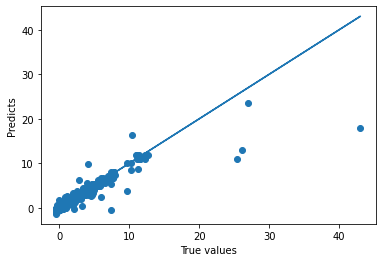

In [57]:
test_predictions = model1.predict(test_datasets)
plt.scatter(test_labels,test_predictions)
plt.xlabel("True values")
plt.ylabel("Predicts")
plt.plot([i for i in test_labels], [i for i in test_labels])
plt.show()

In [65]:
sum_loss = 0
for i in range(len(test_labels)):
    sum_loss = sum_loss + (test_labels[i] - test_predictions[i])**2
print(sum_loss/(len(test_labels)))


[0.16731998]


In [58]:
stats = pd.read_csv('stats.csv',sep='\t', index_col=0)
stats

,count,mean,std,min,25%,50%,75%,max
km_da_di,41148.0,1.471698e+05,2.497685e+06,0.0,20000.0,60000.0,110000.0,3.000000e+08
so_cho_ngoi,41148.0,5.719452e+00,2.211953e+00,2.0,5.0,5.0,7.0,4.700000e+01
nam_sx,41148.0,2.014503e+03,5.699630e+00,1980.0,2011.0,2016.0,2019.0,2.021000e+03
gia,41148.0,8.001651e+08,1.560205e+09,32000000.0,285000000.0,475000000.0,750000000.0,6.800000e+10
tinh_trang_Mới,41148.0,6.994265e-02,2.550534e-01,0.0,0.0,0.0,0.0,1.000000e+00
...,...,...,...,...,...,...,...,...
nhien_lieu_Xăng,41148.0,8.406484e-01,3.660081e-01,0.0,1.0,1.0,1.0,1.000000e+00
nhien_lieu_Điện,41148.0,1.458151e-04,1.207466e-02,0.0,0.0,0.0,0.0,1.000000e+00
hop_so_Bán tự động,41148.0,3.693983e-03,6.066652e-02,0.0,0.0,0.0,0.0,1.000000e+00
hop_so_Số sàn,41148.0,3.510013e-01,4.772891e-01,0.0,0.0,0.0,1.0,1.000000e+00
